## Markov Chain Monte Carlo - An Introduction

### The Metropolis Algorithm

Suppose a politician is standing for reelection and is on campaign mode. Now she has to travel across various constituencies without whose support she will not be able to come to power. However she wants to optimize her time such that she spends more time in constituencies that have a larger population or in other words a larger voter base. 

Unfortunately for her, she does not know population of the various constituencies is unknown to her. It is of course possible to randomly start from one constituency, know the population of the current constituency and also it is highly likely that someone would know the population of the neighbouring constituencies. Let us devise a method so that she visits the constituencies with larger base frequently.

She chooses a constituency at random, once she is done with the rallies and public speeches and meetings with junior party members, she has to (or her campaign team more likely) decide which constituency she needs to visit next. For simplicity let us assume that she can only move east or west and somehow all her constituencies fall on a line. In order to decide whether to move east or west her team tosses a fair coin. If the population of the next constituency decided through the toss is larger than the population of the current one, she moves. If it is not then the team calculates the relative population $ p = \frac{\text{Population}_{current-town}}{\text{Population}_{next-town} }$. Then they spin a spinner which gives values between 0 and 1 with each value being equally probable. If the output of the spinner $p_{spinner}<p$ then she moves to the next town, else she stays in same constituency.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

### Estimating the bias for two coins. 

We have two coins whose bias $\theta_1, \theta_2$ has to be estimated. We assume that the biases are independent of each other. 
Now let us assume a prior of the type $\beta\left(\theta_1|2,2\right)\times\beta\left(\theta_2|2,2\right)$

In [41]:
import scipy.stats as stats
theta1 = np.linspace(0,1,20)
theta2 = np.linspace(0,1,20)
X, Y = np.meshgrid(theta1, theta2)


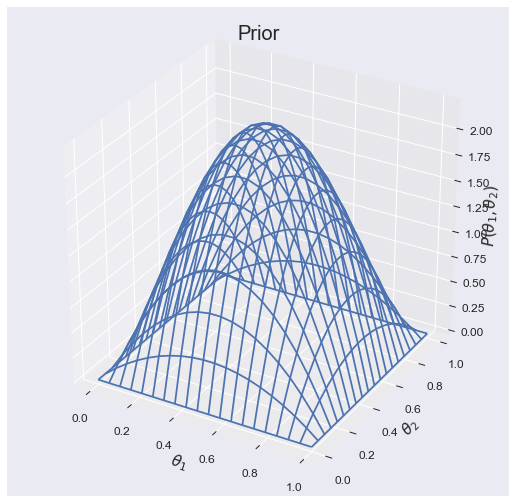

In [53]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, stats.beta.pdf(X,2,2)*stats.beta.pdf(Y,2,2), label = 'Prior distribution')
ax.set_title('Prior', fontsize = 20)
ax.set_xlabel(r'$\theta_1$', fontsize = 15)
ax.set_ylabel(r'$\theta_2$', fontsize = 15)
ax.set_zlabel(r'$P(\theta_1,\theta_2)$', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_axis_on()

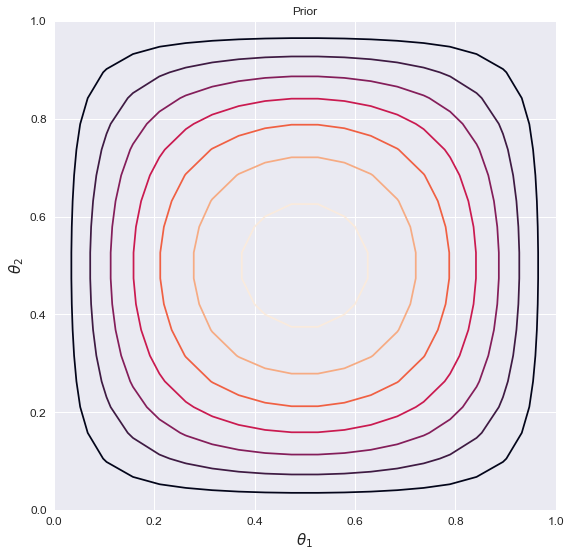

In [57]:
fig,ax = plt.subplots(1,1, figsize = (9, 9))
ax.contour(X, Y, stats.beta.pdf(X,2,2)*stats.beta.pdf(Y,2,2))
ax.set_xlabel(r'$\theta_1$', fontsize = 15)
ax.set_ylabel(r'$\theta_2$', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_title('Prior')
ax.set_axis_on()

If we have $N_1,z_1$ and $N_2, z_2$ as the experimental results, then the likelihood is given by:

$$
P\left(D|\theta_1,\theta_2\right) = \theta_1^{z_1}\left(1-\theta_1\right)^{N_1-z_1}\theta_2^{z_2}\left(1-\theta_2\right)^{N_2-z_2}
$$

Assume the following parameters: $z_1 = 6, N_1 = 8, z_2 = 2, N_2 = 7$

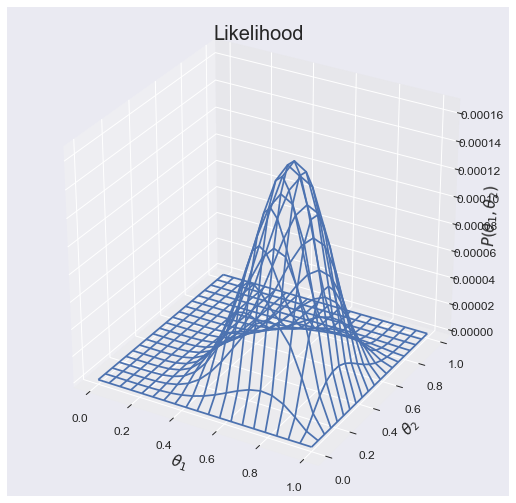

In [55]:
Z = X**6*(1-X)**2*Y**2*(1-Y)**5
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z , label = 'Prior distribution')
ax.set_title('Likelihood', fontsize = 20)
ax.set_xlabel(r'$\theta_1$', fontsize = 15)
ax.set_ylabel(r'$\theta_2$', fontsize = 15)
ax.set_zlabel(r'$P(\theta_1,\theta_2)$', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_axis_on()

The posterior would be given by:
$$
P\left(\theta_1\theta_2|D\right) = \beta\left(\theta_1|z_1+a_1,N_1-z_1+a_1\right)\times\beta\left(\theta_2|z_2+a_2,N_2-z_2+a_2\right)
$$
where  $z_1 = 6, N_1 = 8, z_2 = 2, N_2 = 7, a_1=a_2=2$

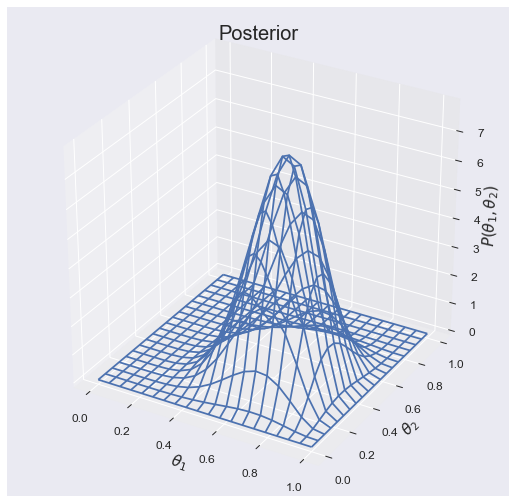

In [56]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, stats.beta.pdf(X,8,4)*stats.beta.pdf(Y,4,7), label = 'Posterior distribution')
ax.set_title('Posterior', fontsize = 20)
ax.set_xlabel(r'$\theta_1$', fontsize = 15)
ax.set_ylabel(r'$\theta_2$', fontsize = 15)
ax.set_zlabel(r'$P(\theta_1,\theta_2)$', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_axis_on()

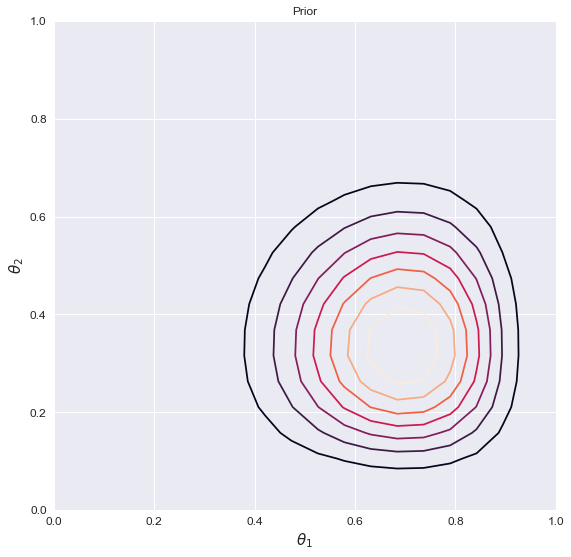

In [59]:
fig,ax = plt.subplots(1,1, figsize = (9, 9))
ax.contour(X, Y, stats.beta.pdf(X,8,4)*stats.beta.pdf(Y,4,7))
ax.set_xlabel(r'$\theta_1$', fontsize = 15)
ax.set_ylabel(r'$\theta_2$', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_title('Prior')
ax.set_axis_on()